OUTLIER DETECTION AND CLEANING - MEMORY NETWORK LOSS ANALYSIS

📊 Processing Memory Utilization:
  🔍 NETLOSS:
    ✅ Cleaned 10 outliers across all memory metrics
  🔍 BASELINE:
    ✅ No outliers detected

📊 Processing Memory Cache:
  🔍 NETLOSS:
    ✅ No outliers detected
  🔍 BASELINE:
    ✅ No outliers detected

📊 Processing Memory Available:
  🔍 NETLOSS:
    ✅ Cleaned 11 outliers across all memory metrics
  🔍 BASELINE:
    ✅ No outliers detected

COMPREHENSIVE MEMORY NETWORK LOSS ANALYSIS

🔄 Analyzing Memory Utilization...


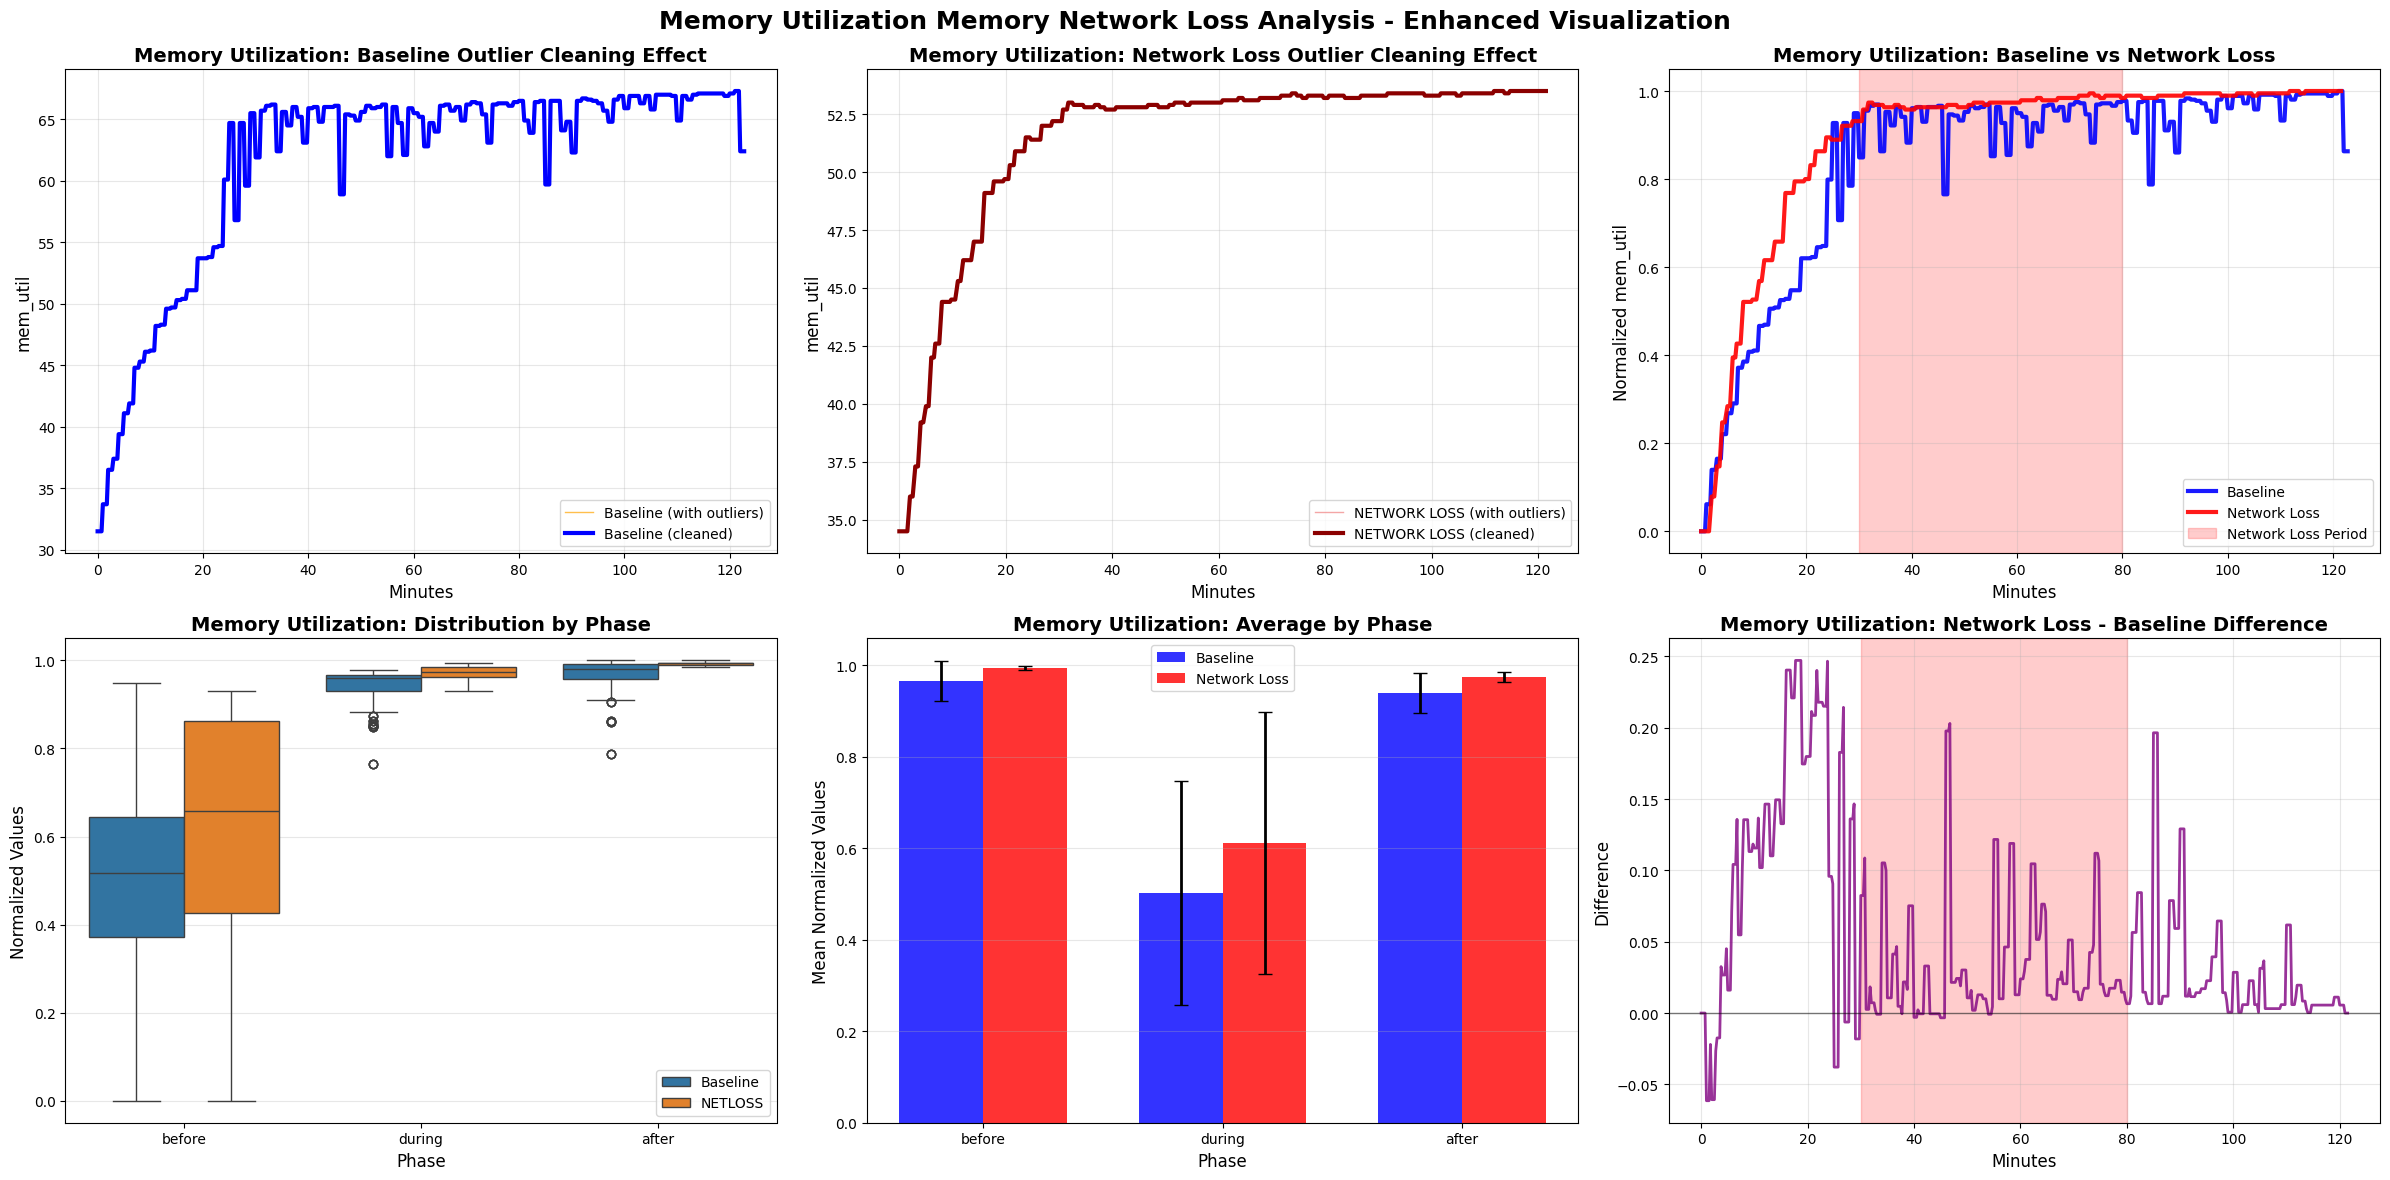


MEMORY UTILIZATION - MEMORY NETWORK LOSS ANALYSIS RESULTS

📊 BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9648  0.0432  0.7877  1.0000
before  0.5023  0.2447  0.0000  0.9497
during  0.9395  0.0430  0.7654  0.9777

📊 NETWORK LOSS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9935  0.0047  0.9842  1.0000
before  0.6112  0.2854  0.0000  0.9316
during  0.9734  0.0112  0.9316  0.9947

🔬 STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -3.17, p=  0.0017 (✅ SIGNIFICANT)
  DURING  : t=-10.82, p=  0.0000 (✅ SIGNIFICANT)
  AFTER   : t= -8.49, p=  0.0000 (✅ SIGNIFICANT)

📈 NETWORK LOSS IMPACT ON MEMORY (% CHANGE):
  BEFORE  :  +21.67% (↗️ INCREASE)
  DURING  :   +3.61% (↗️ INCREASE)
  AFTER   :   +2.97% (↗️ INCREASE)

🔄 Analyzing Memory Cache...


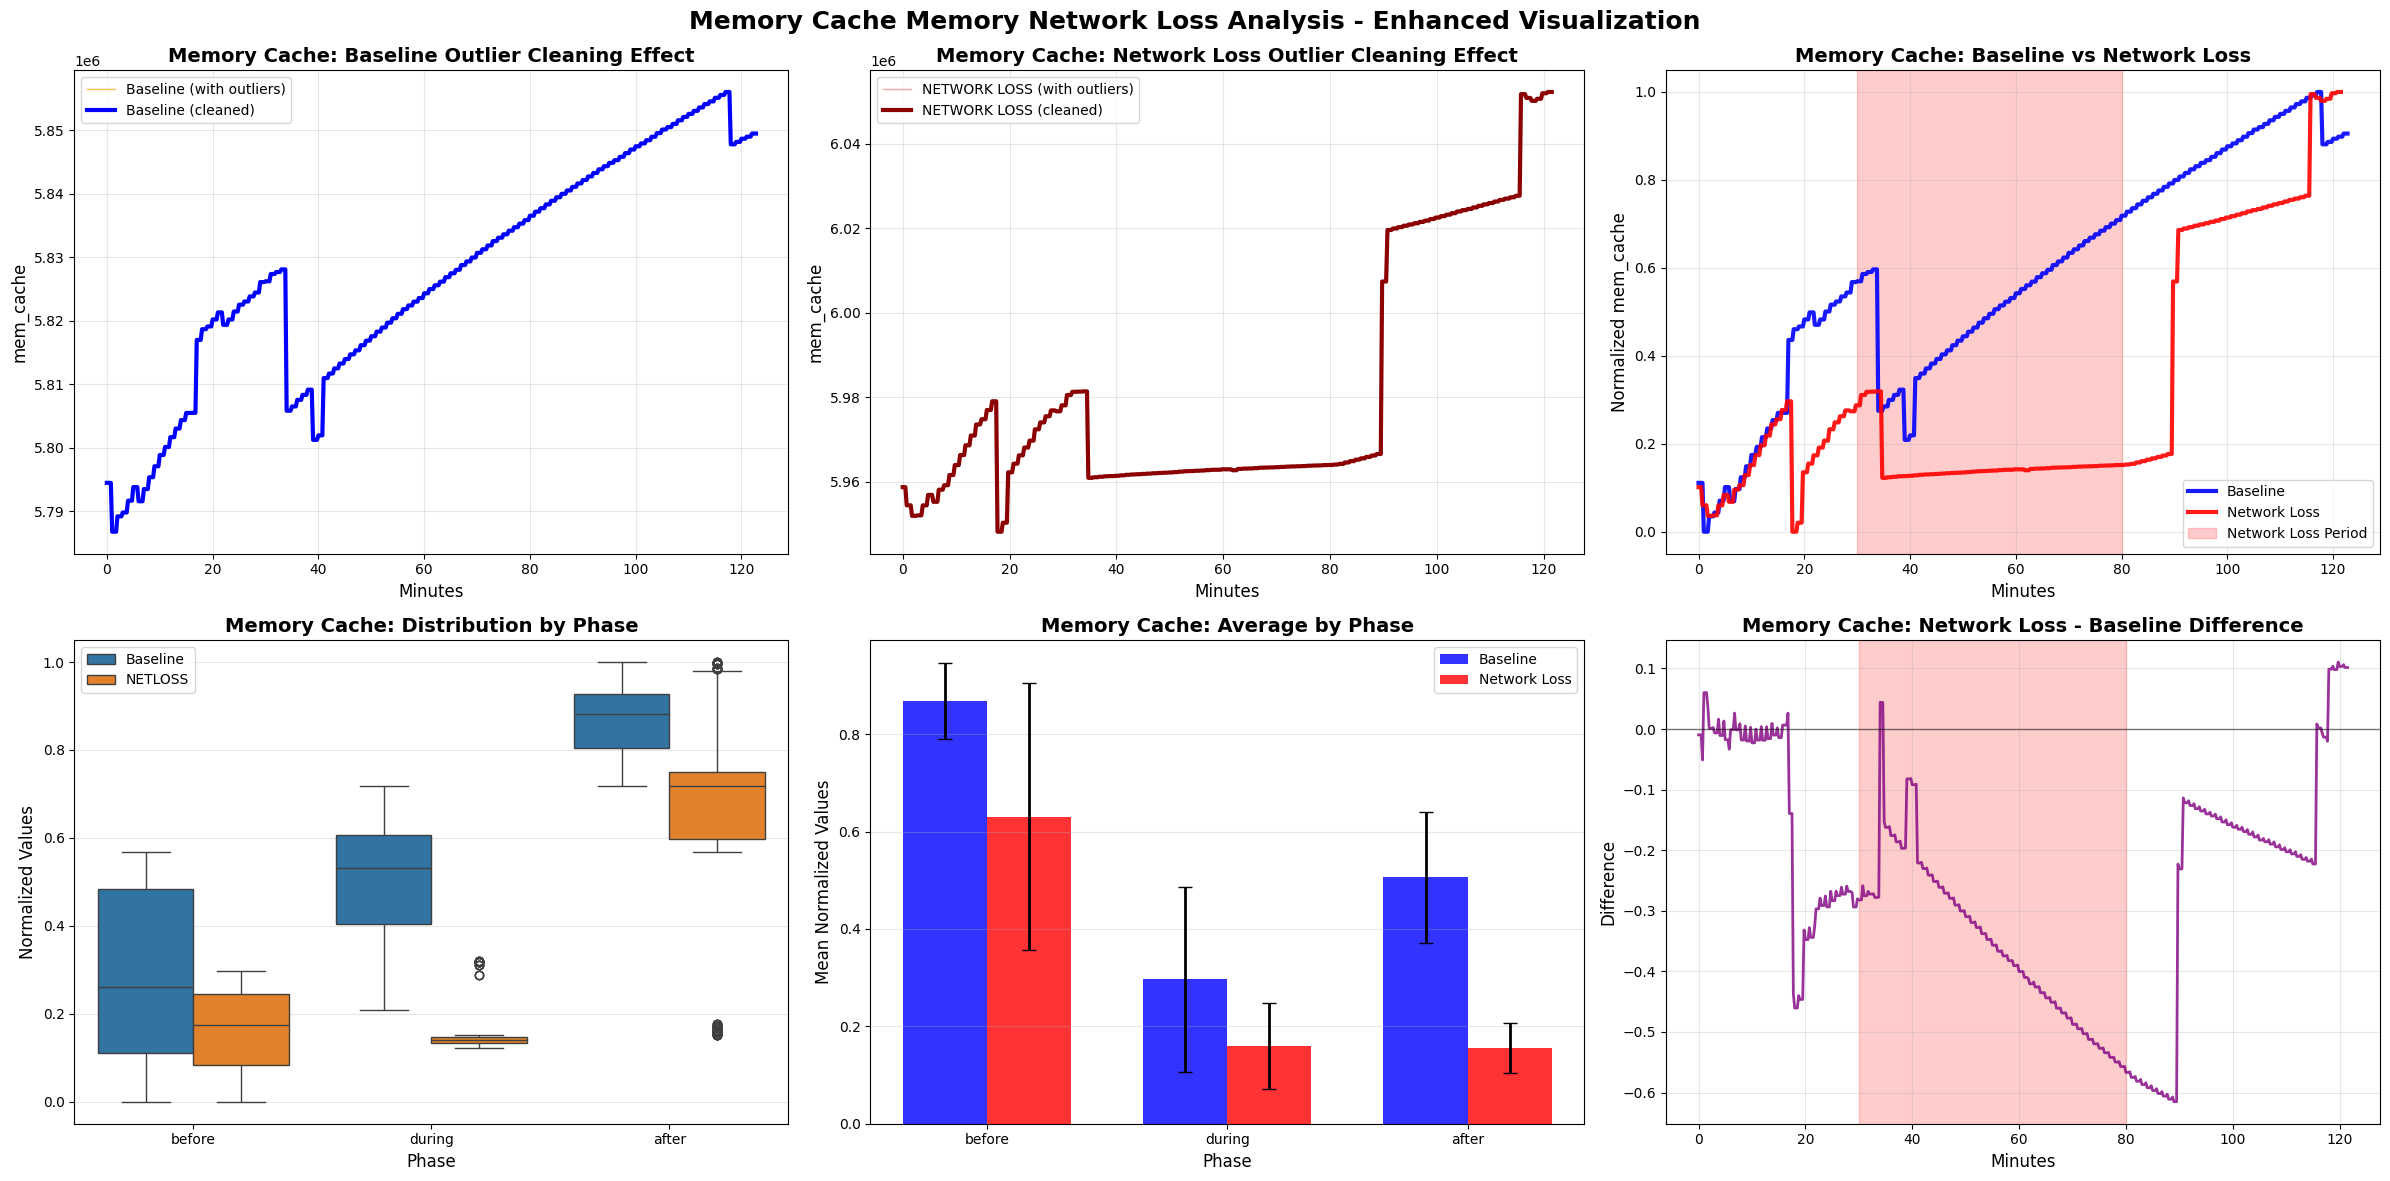


MEMORY CACHE - MEMORY NETWORK LOSS ANALYSIS RESULTS

📊 BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.8676  0.0784  0.7186  1.0000
before  0.2966  0.1901  0.0000  0.5677
during  0.5059  0.1345  0.2089  0.7186

📊 NETWORK LOSS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.6309  0.2737  0.1518  1.0000
before  0.1605  0.0883  0.0000  0.2966
during  0.1553  0.0515  0.1226  0.3191

🔬 STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  7.11, p=  0.0000 (✅ SIGNIFICANT)
  DURING  : t= 34.51, p=  0.0000 (✅ SIGNIFICANT)
  AFTER   : t= 10.86, p=  0.0000 (✅ SIGNIFICANT)

📈 NETWORK LOSS IMPACT ON MEMORY (% CHANGE):
  BEFORE  :  -45.90% (↘️ DECREASE)
  DURING  :  -69.31% (↘️ DECREASE)
  AFTER   :  -27.29% (↘️ DECREASE)

🔄 Analyzing Memory Available...


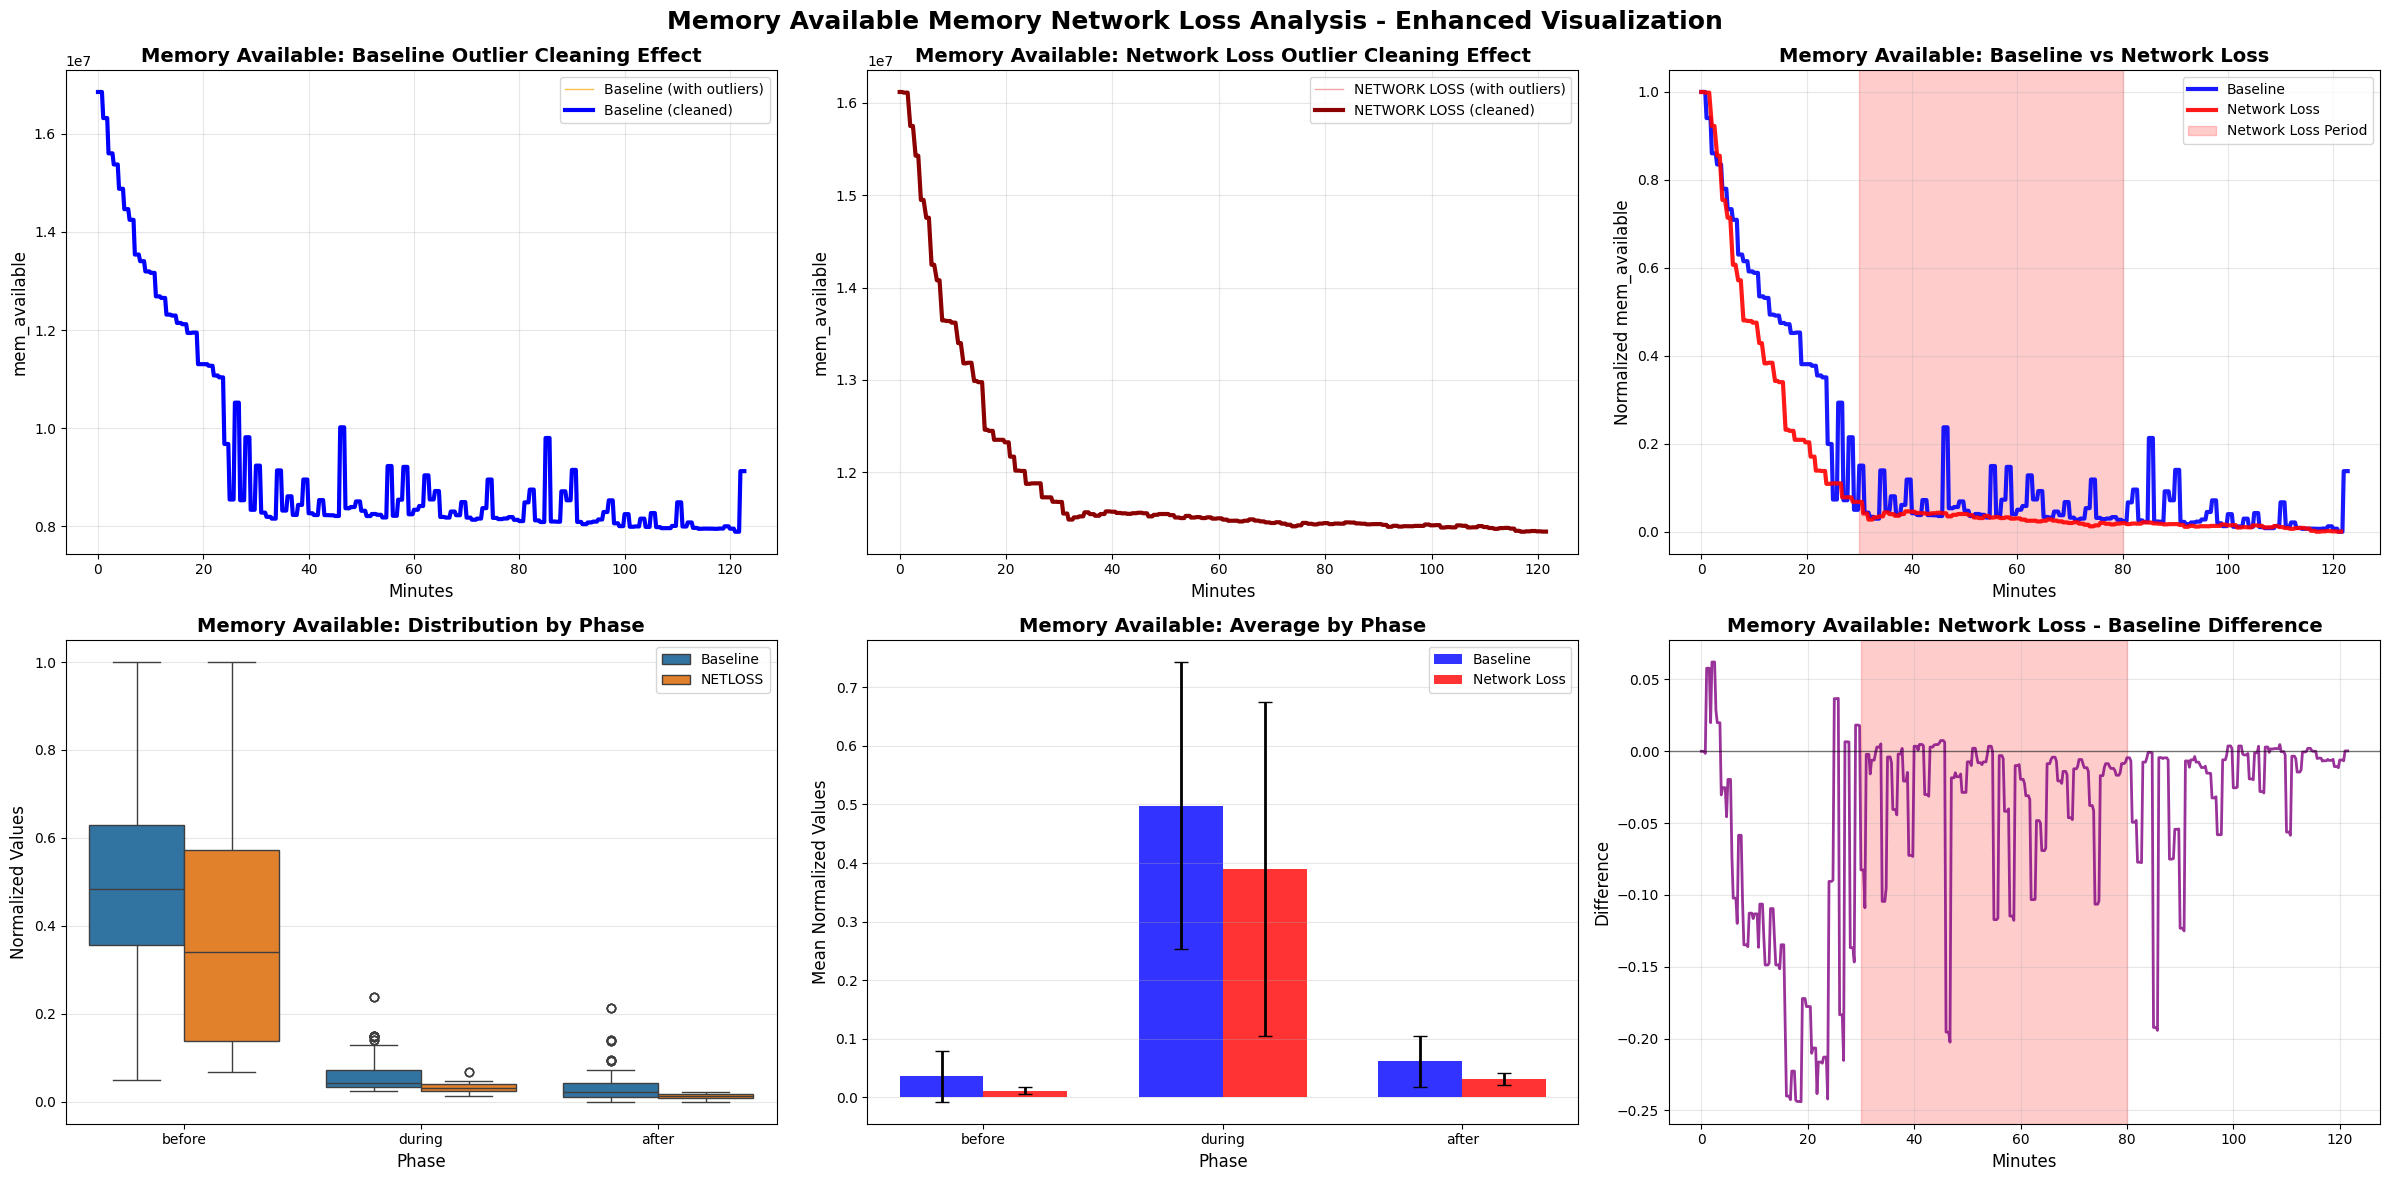


MEMORY AVAILABLE - MEMORY NETWORK LOSS ANALYSIS RESULTS

📊 BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0360  0.0433  0.0000  0.2132
before  0.4979  0.2451  0.0498  1.0000
during  0.0617  0.0432  0.0241  0.2374

📊 NETWORK LOSS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0118  0.0058  0.0000  0.0213
before  0.3895  0.2853  0.0677  1.0000
during  0.0315  0.0103  0.0123  0.0677

🔬 STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  3.16, p=  0.0018 (✅ SIGNIFICANT)
  DURING  : t=  9.64, p=  0.0000 (✅ SIGNIFICANT)
  AFTER   : t=  7.13, p=  0.0000 (✅ SIGNIFICANT)

📈 NETWORK LOSS IMPACT ON MEMORY (% CHANGE):
  BEFORE  :  -21.78% (↘️ DECREASE)
  DURING  :  -48.96% (↘️ DECREASE)
  AFTER   :  -67.19% (↘️ DECREASE)

COMPREHENSIVE MEMORY NETWORK LOSS IMPACT SUMMARY
     Memory_Metric        Phase   Impact (%)      P-Value  Significant  T-Statistic
Memory Utilizatio

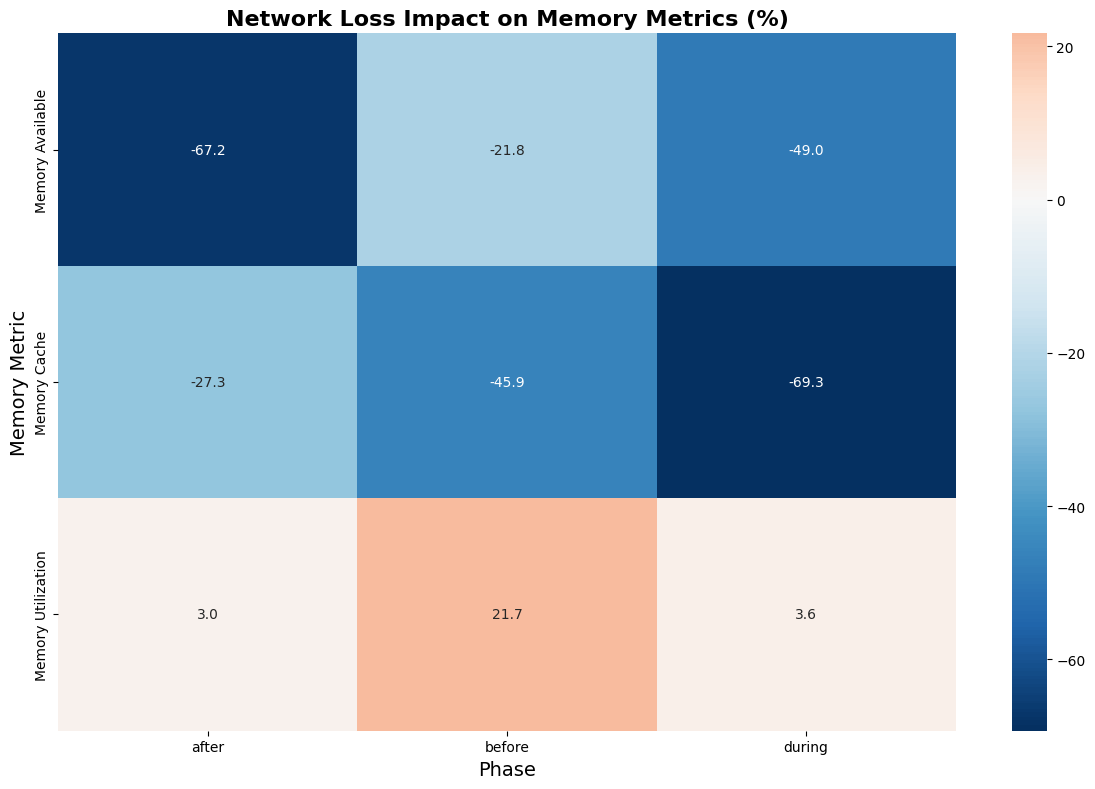

In [1]:
# Complete Memory Network Loss Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as scipy_stats

# Load all memory datasets
df_mem_util = pd.read_csv("mem_util.csv")
df_mem_cache = pd.read_csv("mem_cache.csv")
df_mem_available = pd.read_csv("mem_available.csv")

df_baseline_mem_util = pd.read_csv("../../baseline/memory related/mem_util.csv")
df_baseline_mem_cache = pd.read_csv("../../baseline/memory related/mem_cache.csv")
df_baseline_mem_available = pd.read_csv("../../baseline/memory related/mem_available.csv")

# Add source labels for NETWORK LOSS experiment
df_mem_util["source"] = "NETLOSS"
df_mem_cache["source"] = "NETLOSS"
df_mem_available["source"] = "NETLOSS"

df_baseline_mem_util["source"] = "BASELINE"
df_baseline_mem_cache["source"] = "BASELINE"
df_baseline_mem_available["source"] = "BASELINE"

# Convert to datetime
df_mem_util["Time"] = pd.to_datetime(df_mem_util["Time"])
df_mem_cache["Time"] = pd.to_datetime(df_mem_cache["Time"])
df_mem_available["Time"] = pd.to_datetime(df_mem_available["Time"])

df_baseline_mem_util["Time"] = pd.to_datetime(df_baseline_mem_util["Time"])
df_baseline_mem_cache["Time"] = pd.to_datetime(df_baseline_mem_cache["Time"])
df_baseline_mem_available["Time"] = pd.to_datetime(df_baseline_mem_available["Time"])

delay = 30
duration = 50

# Synchronize test datasets with baseline timeline
time_offset = df_baseline_mem_util["Time"].min() - df_mem_util["Time"].min()
df_mem_util["Time"] += time_offset
df_mem_cache["Time"] += time_offset
df_mem_available["Time"] += time_offset

# Convert timeline to minutes
all_dfs = [
    df_mem_util, df_mem_cache, df_mem_available,
    df_baseline_mem_util, df_baseline_mem_cache, df_baseline_mem_available
]

for df in all_dfs:
    df["Minutes"] = (df["Time"] - df["Time"].min()).dt.total_seconds() / 60

# ORIGINAL DATASETS DICTIONARY
original_datasets = {
    'Memory Utilization': {'netloss': df_mem_util, 'baseline': df_baseline_mem_util},
    'Memory Cache': {'netloss': df_mem_cache, 'baseline': df_baseline_mem_cache},
    'Memory Available': {'netloss': df_mem_available, 'baseline': df_baseline_mem_available}
}

# CONSERVATIVE OUTLIER DETECTION FOR MEMORY METRICS
def remove_outliers_comprehensive_memory(df, method='iqr', threshold=2.5):
    """
    Conservative outlier detection for memory metrics to avoid removing normal patterns
    like system initialization, gradual memory usage changes, etc.
    """
    df_clean = df.copy()
    outlier_stats = {}
    
    # Get all numeric columns except Time, Minutes, and source
    numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns 
                   if col not in ['Time', 'Minutes']]
    
    if method == 'iqr':
        for col in numeric_cols:
            # Use more conservative threshold for memory metrics
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            # More conservative bounds - only catch extreme outliers
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            
            # Additional check: avoid flagging initial system behavior
            # Only flag outliers that are extreme spikes/drops, not gradual changes
            series = df[col]
            outlier_mask = pd.Series(False, index=df.index)
            
            # Find extreme spikes (sudden jumps)
            if len(series) > 1:
                diff = series.diff().abs()
                if diff.std() > 0:  # Avoid division by zero
                    extreme_changes = diff > (3 * diff.std())  # Very large sudden changes
                    extreme_values = (series < lower_bound) | (series > upper_bound)
                    
                    # Only flag as outliers if both conditions are met
                    outlier_mask = extreme_changes & extreme_values
            
            outlier_stats[col] = {
                'count': outlier_mask.sum(),
                'percentage': (outlier_mask.sum() / len(df[col])) * 100,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound
            }
            
            # Only interpolate if we actually found outliers
            if outlier_mask.sum() > 0:
                df_clean.loc[outlier_mask, col] = np.nan
                df_clean[col] = df_clean[col].interpolate(method='linear')
                
    return df_clean, outlier_stats

# APPLY OUTLIER CLEANING
print("=" * 80)
print("OUTLIER DETECTION AND CLEANING - MEMORY NETWORK LOSS ANALYSIS")
print("=" * 80)

datasets_clean = {}
all_outlier_stats = {}

for dataset_name, dataset_pair in original_datasets.items():
    print(f"\n📊 Processing {dataset_name}:")
    
    datasets_clean[dataset_name] = {}
    all_outlier_stats[dataset_name] = {}
    
    for source_type, df in dataset_pair.items():
        print(f"  🔍 {source_type.upper().replace('_', ' ')}:")
        df_clean, stats = remove_outliers_comprehensive_memory(df, method='iqr', threshold=2.5)
        datasets_clean[dataset_name][source_type] = df_clean
        all_outlier_stats[dataset_name][source_type] = stats
        
        # Print outlier summary
        total_outliers = sum([s['count'] for s in stats.values()])
        if total_outliers > 0:
            print(f"    ✅ Cleaned {total_outliers} outliers across all memory metrics")
        else:
            print(f"    ✅ No outliers detected")

# NORMALIZATION FUNCTION
def normalize_df_memory(df, columns):
    result = df.copy()
    for col in columns:
        min_val = df[col].min()
        max_val = df[col].max()
        if max_val > min_val:  
            result[col] = (df[col] - min_val) / (max_val - min_val)
        else:
            result[col] = 0
    return result

# ADD PHASE COLUMN 
def add_phase_column(df, delay_minutes, duration_minutes):
    df = df.copy()
    df['phase'] = 'before'  
    df.loc[(df['Minutes'] >= delay_minutes) & (df['Minutes'] <= delay_minutes + duration_minutes), 'phase'] = 'during'  
    df.loc[df['Minutes'] > delay_minutes + duration_minutes, 'phase'] = 'after' 
    return df

# ANALYSIS AND PLOT FUNCTION FOR MEMORY NETWORK LOSS
def analyze_and_plot_memory_dataset_wide(dataset_name, netloss_df, baseline_df, delay_minutes, duration_minutes):
    numeric_cols = [col for col in netloss_df.select_dtypes(include=[np.number]).columns 
                   if col not in ['Time', 'Minutes']]
    
    netloss_norm = normalize_df_memory(netloss_df, numeric_cols)
    baseline_norm = normalize_df_memory(baseline_df, numeric_cols)
    
    # For memory metrics, we typically have single metrics, so we'll use the main metric
    main_metric = numeric_cols[0] if numeric_cols else None
    
    if main_metric is None:
        print(f"No numeric columns found for {dataset_name}")
        return None
    
    # Add phase information
    netloss_norm = add_phase_column(netloss_norm, delay_minutes, duration_minutes)
    baseline_norm = add_phase_column(baseline_norm, delay_minutes, duration_minutes)
    
    # Statistical analysis
    stats_baseline = baseline_norm.groupby('phase')[main_metric].agg(['mean', 'std', 'min', 'max'])
    stats_netloss = netloss_norm.groupby('phase')[main_metric].agg(['mean', 'std', 'min', 'max'])
    
    # Combined dataframe for analysis
    df_combined = pd.DataFrame({
        'Baseline': baseline_norm[main_metric],
        'NETLOSS': netloss_norm[main_metric],
        'Minutes': baseline_norm['Minutes'],
        'phase': baseline_norm['phase'],
        'difference': netloss_norm[main_metric] - baseline_norm[main_metric]
    })
    
    # T-tests for statistical significance
    t_tests = {}
    for phase in ['before', 'during', 'after']:
        data = df_combined[df_combined['phase'] == phase]
        t_stat, p_value = scipy_stats.ttest_ind(data['Baseline'].dropna(), data['NETLOSS'].dropna())
        t_tests[phase] = {'t': t_stat, 'p': p_value}
    
    # Calculate percentage impact
    impact = {}
    for phase in ['before', 'during', 'after']:
        baseline_mean = stats_baseline.loc[phase, 'mean']
        netloss_mean = stats_netloss.loc[phase, 'mean']
        impact[phase] = ((netloss_mean - baseline_mean) / baseline_mean) * 100 if baseline_mean != 0 else float('inf')
    
    # PLOTTING
    fig = plt.figure(figsize=(24, 12))
    
    # 1. Baseline outlier cleaning effect
    plt.subplot(2, 3, 1)
    original_baseline = original_datasets[dataset_name]['baseline']
    
    plt.plot(original_baseline['Minutes'], original_baseline[main_metric], 
             label='Baseline (with outliers)', color='orange', alpha=0.7, linewidth=1)
    plt.plot(baseline_df['Minutes'], baseline_df[main_metric], 
             label='Baseline (cleaned)', linewidth=3, color='blue')
    plt.title(f'{dataset_name}: Baseline Outlier Cleaning Effect', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel(f'{main_metric}', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 2. NETWORK LOSS outlier cleaning effect
    plt.subplot(2, 3, 2)
    original_netloss = original_datasets[dataset_name]['netloss']
    
    plt.plot(original_netloss['Minutes'], original_netloss[main_metric], 
             label='NETWORK LOSS (with outliers)', alpha=0.7, color='lightcoral', linewidth=1)
    plt.plot(netloss_df['Minutes'], netloss_df[main_metric], 
             label='NETWORK LOSS (cleaned)', linewidth=3, color='darkred')
    plt.title(f'{dataset_name}: Network Loss Outlier Cleaning Effect', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel(f'{main_metric}', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 3. Timeline comparison
    plt.subplot(2, 3, 3)
    plt.plot(baseline_norm['Minutes'], baseline_norm[main_metric], 
             label='Baseline', linewidth=3, color='blue', alpha=0.9)
    plt.plot(netloss_norm['Minutes'], netloss_norm[main_metric], 
             label='Network Loss', linewidth=3, color='red', alpha=0.9)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="Network Loss Period")
    plt.title(f"{dataset_name}: Baseline vs Network Loss", fontsize=14, fontweight='bold')
    plt.xlabel("Minutes", fontsize=12)
    plt.ylabel(f"Normalized {main_metric}", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    # 4. Box plot by phase
    plt.subplot(2, 3, 4)
    box_data = pd.melt(df_combined[['Baseline', 'NETLOSS', 'phase']], 
                      id_vars=['phase'], var_name='source', value_name='value')
    sns.boxplot(x='phase', y='value', hue='source', data=box_data, ax=plt.gca())
    plt.title(f'{dataset_name}: Distribution by Phase', fontsize=14, fontweight='bold')
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Normalized Values', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.legend(fontsize=10)
    
    # 5. Statistics by phase
    plt.subplot(2, 3, 5)
    phases = ['before', 'during', 'after']
    x = np.arange(len(phases))
    width = 0.35
    
    bars1 = plt.bar(x - width/2, stats_baseline['mean'], width, label='Baseline', alpha=0.8, color='blue')
    bars2 = plt.bar(x + width/2, stats_netloss['mean'], width, label='Network Loss', alpha=0.8, color='red')
    
    plt.errorbar(x - width/2, stats_baseline['mean'], yerr=stats_baseline['std'], 
                fmt='none', ecolor='black', capsize=5, linewidth=2)
    plt.errorbar(x + width/2, stats_netloss['mean'], yerr=stats_netloss['std'], 
                fmt='none', ecolor='black', capsize=5, linewidth=2)
    
    plt.title(f'{dataset_name}: Average by Phase', fontsize=14, fontweight='bold')
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Mean Normalized Values', fontsize=12)
    plt.xticks(x, phases)
    plt.legend(fontsize=10)
    plt.grid(axis='y', alpha=0.3)
    
    # 6. Difference over time
    plt.subplot(2, 3, 6)
    plt.plot(df_combined['Minutes'], df_combined['difference'], 
             color='purple', linewidth=2, alpha=0.8)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2)
    plt.title(f'{dataset_name}: Network Loss - Baseline Difference', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel('Difference', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.suptitle(f'{dataset_name} Memory Network Loss Analysis - Enhanced Visualization', 
                fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
    
    # Print statistical results
    print(f"\n{'='*80}")
    print(f"{dataset_name.upper()} - MEMORY NETWORK LOSS ANALYSIS RESULTS")
    print(f"{'='*80}")
    
    print(f"\n📊 BASELINE STATISTICS BY PHASE:")
    print(stats_baseline.round(4))
    
    print(f"\n📊 NETWORK LOSS STATISTICS BY PHASE:")
    print(stats_netloss.round(4))
    
    print(f"\n🔬 STATISTICAL SIGNIFICANCE TESTS:")
    for phase, test in t_tests.items():
        sig = "✅ SIGNIFICANT" if test['p'] < 0.05 else "❌ NOT SIGNIFICANT"
        print(f"  {phase.upper():8}: t={test['t']:6.2f}, p={test['p']:8.4f} ({sig})")
    
    print(f"\n📈 NETWORK LOSS IMPACT ON MEMORY (% CHANGE):")
    for phase, change in impact.items():
        direction = "↗️ INCREASE" if change > 0 else "↘️ DECREASE" if change < 0 else "→ NO CHANGE"
        print(f"  {phase.upper():8}: {change:+7.2f}% ({direction})")
    
    return {
        'stats_baseline': stats_baseline,
        'stats_netloss': stats_netloss,
        't_tests': t_tests,
        'impact': impact,
        'combined_data': df_combined,
        'main_metric': main_metric
    }

# RUN ANALYSIS 
print(f"\n{'='*80}")
print("COMPREHENSIVE MEMORY NETWORK LOSS ANALYSIS")
print(f"{'='*80}")

analysis_results = {}

for dataset_name in datasets_clean.keys():
    print(f"\n🔄 Analyzing {dataset_name}...")
    
    netloss_clean = datasets_clean[dataset_name]['netloss']
    baseline_clean = datasets_clean[dataset_name]['baseline']
    
    analysis_results[dataset_name] = analyze_and_plot_memory_dataset_wide(
        dataset_name, 
        netloss_clean, 
        baseline_clean, 
        delay, 
        duration
    )

# FINAL  SUMMARY
print(f"\n{'='*100}")
print("COMPREHENSIVE MEMORY NETWORK LOSS IMPACT SUMMARY")
print(f"{'='*100}")

summary_table = []
for dataset_name, results in analysis_results.items():
    if results:  # Check if analysis was successful
        for phase in ['before', 'during', 'after']:
            summary_table.append({
                'Memory_Metric': dataset_name,
                'Phase': phase,
                'Impact (%)': f"{results['impact'][phase]:+.1f}%",
                'P-Value': f"{results['t_tests'][phase]['p']:.4f}",
                'Significant': 'YES' if results['t_tests'][phase]['p'] < 0.05 else 'NO',
                'T-Statistic': f"{results['t_tests'][phase]['t']:.2f}"
            })

if summary_table:
    summary_df = pd.DataFrame(summary_table)
    print(summary_df.to_string(index=False, col_space=12))

    # IMPACT HEATMAP
    fig, ax = plt.subplots(figsize=(12, 8))
    pivot_data = summary_df.copy()
    pivot_data['Impact (%)'] = pivot_data['Impact (%)'].str.replace('%', '').astype(float)
    pivot_table = pivot_data.pivot(index='Memory_Metric', columns='Phase', values='Impact (%)')

    sns.heatmap(pivot_table, annot=True, cmap='RdBu_r', center=0, ax=ax, fmt='.1f')
    plt.title('Network Loss Impact on Memory Metrics (%)', fontsize=16, fontweight='bold')
    plt.ylabel('Memory Metric', fontsize=14)
    plt.xlabel('Phase', fontsize=14)
    plt.tight_layout()
    plt.show()
